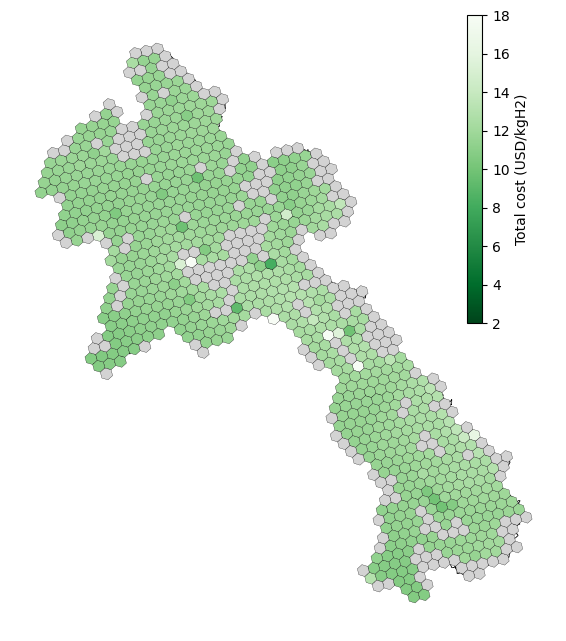

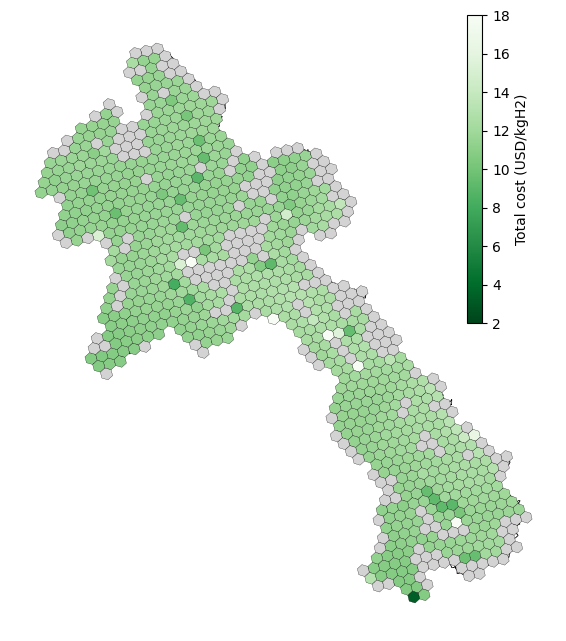

In [89]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs

# Function to plot the full cost map
def plot_full_cost_map(hexagons, demand_center, cost_column, save_path, provinces=None, vmin=None, vmax=None):
    """
    Plots a map showing production costs in USD/kg with province boundaries.
    
    Parameters:
    - hexagons: GeoDataFrame containing the hexagons and data.
    - demand_center: Name of the demand center (e.g., 'Vientiane').
    - cost_column: The specific column for production cost (e.g., 'Vientiane trucking production cost').
    - save_path: File path to save the PNG image.
    - provinces: GeoDataFrame for province boundaries.
    - vmin: Minimum value for the color scale (optional).
    - vmax: Maximum value for the color scale (optional).
    """
    crs = ccrs.PlateCarree()  # Example projection, adjust as needed
    fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': crs})
    ax.set_axis_off()

    hexagons_copy = hexagons.copy()

    # Mask zero values
    zero_mask = hexagons_copy[cost_column] == 0
    hexagons_copy.loc[zero_mask, cost_column] = np.nan

    # Plot the province boundaries if provided (this will be below the hexagons)
    if provinces is not None:
        provinces.to_crs(crs.proj4_init).plot(
            ax=ax, color='none', edgecolor='black', linewidth=0.5)

    # Plot the hexagons with production cost, applying the min/max thresholds
    plot = hexagons_copy.to_crs(crs.proj4_init).plot(
        ax=ax,
        column=cost_column,
        legend=True,
        cmap='Greens_r',
        legend_kwds={
            'label': 'Total cost (USD/kgH2)',
            'orientation': 'vertical',
            'shrink': 0.5,
            'pad': 0.05,
            'anchor': (-1.1, 1.0)
        },
        missing_kwds={
            "color": "lightgrey",
            "label": "No Data or Zero",
        },
        edgecolor='black',
        linewidth=0.2,
        vmin=vmin,  # Set the minimum value for the color scale
        vmax=vmax   # Set the maximum value for the color scale
    )

    # Adjust legend position to be on the right side and closer to the center
    if plot.get_legend() is not None:
        legend = plot.get_legend()
        legend.set_bbox_to_anchor((1, 0.5))
        legend.set_frame_on(True)

    plt.show()

    # Save the figure
    fig.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close(fig)


# Load province data
provinces = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Laos_specific\Data\provinces_laos.geojson')

# Set parameters for vmin and vmax for the color scale
vmin = 2
vmax = 18

# Load the hex cost components for 2019
gdf_2019 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Seasonality\2019\hex_cost_components.geojson')


# Plot for 2019
plot_full_cost_map(
    gdf_2019, 'Vientiane', 'Vientiane trucking total cost', 
    r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Seasonality\visualisation\2019_visualisation_lowest_cost.png', 
    provinces, vmin, vmax
)

# Load the hex cost components for 2022
gdf_2022 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Seasonality\2022\hex_cost_components.geojson')

# Plot for 2022
plot_full_cost_map(
    gdf_2022, 'Vientiane', 'Vientiane trucking total cost', 
    r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Seasonality\visualisation\2022_visualisation_lowest_cost.png', 
    provinces, vmin, vmax
)

In [94]:
gdf_2022.drop_duplicates(subset="h3_index")

,h3_index,n0,n1,n2,n3,n4,n5,waterbody_dist,waterway_dist,road_dist,...,Vientiane LCOH - trucking wind portion,Vientiane pipeline solar costs,Vientiane LCOH - pipeline solar portion,Vientiane trucking solar costs,Vientiane LCOH - trucking solar portion,Vientiane pipeline hydro costs,Vientiane LCOH - pipeline hydro portion,Vientiane trucking hydro costs,Vientiane LCOH - trucking hydro portion,geometry
0,85659663fffffff,11,703,772,404,137,657,11.131949,0.0,0.0,...,0.0,4.879996e+07,7.516590,4.895814e+07,7.540954,0.000000e+00,0.000000,0.000000e+00,0.000000,"POLYGON ((107.15978 14.99114, 107.13812 15.084..."
1,85659353fffffff,193,638,464,528,593,514,11.131949,0.0,0.0,...,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,"POLYGON ((105.76156 15.42957, 105.73927 15.522..."
3,856492c7fffffff,738,919,8,724,561,0,0.000000,0.0,0.0,...,0.0,4.332835e+07,6.673805,4.344981e+07,6.692514,0.000000e+00,0.000000,0.000000e+00,0.000000,"POLYGON ((100.99411 21.27766, 100.9695 21.3686..."
5,85414993fffffff,476,571,650,810,559,554,11.131949,0.0,0.0,...,0.0,4.726533e+07,7.280214,4.757306e+07,7.327612,0.000000e+00,0.000000,0.000000e+00,0.000000,"POLYGON ((102.71763 19.17734, 102.69384 19.269..."
6,85414d7bfffffff,820,647,149,731,557,250,0.000000,0.0,0.0,...,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,"POLYGON ((103.22503 19.28378, 103.20142 19.375..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128,856593d7fffffff,861,261,163,84,579,371,0.000000,0.0,0.0,...,0.0,4.751095e+07,7.318046,4.752720e+07,7.320549,0.000000e+00,0.000000,0.000000e+00,0.000000,"POLYGON ((105.77919 14.99269, 105.75694 15.085..."
1129,856596abfffffff,373,241,725,34,225,0,15.742953,0.0,0.0,...,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,"POLYGON ((107.12602 14.39862, 107.10439 14.491..."
1131,85416a6ffffffff,523,379,931,0,0,0,22.263898,0.0,0.0,...,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,"POLYGON ((104.9491 18.76562, 104.92623 18.8577..."
1133,854168dbfffffff,263,781,27,343,215,450,11.131949,0.0,0.0,...,0.0,4.885337e+07,7.524818,4.911044e+07,7.564413,0.000000e+00,0.000000,0.000000e+00,0.000000,"POLYGON ((105.52428 17.13654, 105.50177 17.229..."


In [90]:
print(gdf_2019['Vientiane lowest cost'].min())
print(gdf_2022['Vientiane lowest cost'].min())

8.210385863726241
3.2942938025079114


In [11]:
demand_center = 'Vientiane'
print("\nPipeline min/avg LCOH cost:")
print(gdf_2019[f'{demand_center} pipeline production cost'].min())
print(gdf_2019[f'{demand_center} pipeline production cost'].mean())
# print(gdf_2019[f'{demand_center} pipeline production cost'].max())
print("Pipeline min/avg total cost:")
print(gdf_2019[f'{demand_center} pipeline total cost'].min())
print(gdf_2019[f'{demand_center} pipeline total cost'].mean())
# print(gdf_2019[f'{demand_center} pipeline total cost'].max())
print("\nTrucking min/avg LCOH cost:")
print(gdf_2019[f'{demand_center} trucking production cost'].min())
print(gdf_2019[f'{demand_center} trucking production cost'].mean())
# print(gdf_2019[f'{demand_center} trucking production cost'].max())
print("\nTrucking min/avg total cost:")
print(gdf_2019[f'{demand_center} trucking total cost'].min())
print(gdf_2019[f'{demand_center} trucking total cost'].mean())
# print(gdf_2019[f'{demand_center} trucking total cost'].max())


print("\nLowest cost min/max total cost:")
print(gdf_2019[f'{demand_center} lowest cost'].min())
# print(gdf_2019[f'{demand_center} lowest cost'].max())


Pipeline min/avg LCOH cost:
7.7695608349290906
11.35867798069076
Pipeline min/avg total cost:
8.643062557239018
12.70172293559858

Trucking min/avg LCOH cost:
7.8456973879748215
11.426416869761573

Trucking min/avg total cost:
8.210385863726241
11.850548676970476

Lowest cost min/max total cost:
8.210385863726241


In [10]:
demand_center = 'Vientiane'
print("\nPipeline min/avg LCOH cost:")
print(gdf_2022[f'{demand_center} pipeline production cost'].min())
print(gdf_2022[f'{demand_center} pipeline production cost'].mean())
# print(gdf_2022[f'{demand_center} pipeline production cost'].max())
print("Pipeline min/avg total cost:")
print(gdf_2022[f'{demand_center} pipeline total cost'].min())
print(gdf_2022[f'{demand_center} pipeline total cost'].mean())
# print(gdf_2022[f'{demand_center} pipeline total cost'].max())
print("\nTrucking min/avg LCOH cost:")
print(gdf_2022[f'{demand_center} trucking production cost'].min())
print(gdf_2022[f'{demand_center} trucking production cost'].mean())
# print(gdf_2022[f'{demand_center} trucking production cost'].max())
print("\nTrucking min/avg total cost:")
print(gdf_2022[f'{demand_center} trucking total cost'].min())
print(gdf_2022[f'{demand_center} trucking total cost'].mean())
# print(gdf_2022[f'{demand_center} trucking total cost'].max())


print("\nLowest cost min/max total cost:")
print(gdf_2022[f'{demand_center} lowest cost'].min())
# print(gdf_2022[f'{demand_center} lowest cost'].max())


Pipeline min/avg LCOH cost:
2.6682133375535058
11.341049304432563
Pipeline min/avg total cost:
4.937425422089032
12.685043483050245

Trucking min/avg LCOH cost:
2.760951780841721
11.409658389559894

Trucking min/avg total cost:
3.2942938025079114
11.83390826465014

Lowest cost min/max total cost:
3.2942938025079114


In [14]:
# Assuming gdf_2019 and gdf_2022 are your dataframes and demand_center is defined

# Extract min and mean values for 2019
pipeline_prod_min_2019 = gdf_2019[f'{demand_center} pipeline production cost'].min()
pipeline_prod_avg_2019 = gdf_2019[f'{demand_center} pipeline production cost'].mean()

pipeline_total_min_2019 = gdf_2019[f'{demand_center} pipeline total cost'].min()
pipeline_total_avg_2019 = gdf_2019[f'{demand_center} pipeline total cost'].mean()

trucking_prod_min_2019 = gdf_2019[f'{demand_center} trucking production cost'].min()
trucking_prod_avg_2019 = gdf_2019[f'{demand_center} trucking production cost'].mean()

trucking_total_min_2019 = gdf_2019[f'{demand_center} trucking total cost'].min()
trucking_total_avg_2019 = gdf_2019[f'{demand_center} trucking total cost'].mean()

# Extract min and mean values for 2022
pipeline_prod_min_2022 = gdf_2022[f'{demand_center} pipeline production cost'].min()
pipeline_prod_avg_2022 = gdf_2022[f'{demand_center} pipeline production cost'].mean()

pipeline_total_min_2022 = gdf_2022[f'{demand_center} pipeline total cost'].min()
pipeline_total_avg_2022 = gdf_2022[f'{demand_center} pipeline total cost'].mean()

trucking_prod_min_2022 = gdf_2022[f'{demand_center} trucking production cost'].min()
trucking_prod_avg_2022 = gdf_2022[f'{demand_center} trucking production cost'].mean()

trucking_total_min_2022 = gdf_2022[f'{demand_center} trucking total cost'].min()
trucking_total_avg_2022 = gdf_2022[f'{demand_center} trucking total cost'].mean()

# Format all values to 2 decimal places and add the $/kg unit
latex_table = f"""
\\begin{{table}}[htbp]
\\centering
\\begin{{tabular}}{{lrrrr}}
\\toprule
\\textbf{{Cost Type}} & \\textbf{{Min 2019 (\$/kg)}} & \\textbf{{Avg 2019 (\$/kg)}} & \\textbf{{Min 2022 (\$/kg)}} & \\textbf{{Avg 2022 (\$/kg)}} \\\\
\\midrule
\\textbf{{Pipeline LCOH Production Cost}} & {pipeline_prod_min_2019:.2f} & {pipeline_prod_avg_2019:.2f} & {pipeline_prod_min_2022:.2f} & {pipeline_prod_avg_2022:.2f} \\\\
\\textbf{{Pipeline Total Cost}} & {pipeline_total_min_2019:.2f} & {pipeline_total_avg_2019:.2f} & {pipeline_total_min_2022:.2f} & {pipeline_total_avg_2022:.2f} \\\\
\\textbf{{Trucking LCOH Production Cost}} & {trucking_prod_min_2019:.2f} & {trucking_prod_avg_2019:.2f} & {trucking_prod_min_2022:.2f} & {trucking_prod_avg_2022:.2f} \\\\
\\textbf{{Trucking Total Cost}} & {trucking_total_min_2019:.2f} & {trucking_total_avg_2019:.2f} & {trucking_total_min_2022:.2f} & {trucking_total_avg_2022:.2f} \\\\
\\bottomrule
\\end{{tabular}}
\\caption{{Cost comparison between 2019 and 2022 for {demand_center}}}
\\end{{table}}
"""

# Print the LaTeX table to copy into Overleaf
print(latex_table)



\begin{table}[htbp]
\centering
\begin{tabular}{lrrrr}
\toprule
\textbf{Cost Type} & \textbf{Min 2019 (\$/kg)} & \textbf{Avg 2019 (\$/kg)} & \textbf{Min 2022 (\$/kg)} & \textbf{Avg 2022 (\$/kg)} \\
\midrule
\textbf{Pipeline LCOH Production Cost} & 7.77 & 11.36 & 2.67 & 11.34 \\
\textbf{Pipeline Total Cost} & 8.64 & 12.70 & 4.94 & 12.69 \\
\textbf{Trucking LCOH Production Cost} & 7.85 & 11.43 & 2.76 & 11.41 \\
\textbf{Trucking Total Cost} & 8.21 & 11.85 & 3.29 & 11.83 \\
\bottomrule
\end{tabular}
\caption{Cost comparison between 2019 and 2022 for Vientiane}
\end{table}



In [76]:
# Assuming gdf_2019, gdf_2022, and demand_center are already defined
# Filtering hexagons that have hydro power installed
gdf_pipeline_hydro_2019 = gdf_2019[gdf_2019[f'{demand_center} pipeline hydro capacity'] > 0]
gdf_pipeline_hydro_2022 = gdf_2022[gdf_2022[f'{demand_center} pipeline hydro capacity'] > 0]

# Extract min and mean values for 2019
pipeline_prod_min_2019 = gdf_pipeline_hydro_2019[f'{demand_center} pipeline production cost'].min()
pipeline_prod_avg_2019 = gdf_pipeline_hydro_2019[f'{demand_center} pipeline production cost'].mean()

pipeline_total_min_2019 = gdf_pipeline_hydro_2019[f'{demand_center} pipeline total cost'].min()
pipeline_total_avg_2019 = gdf_pipeline_hydro_2019[f'{demand_center} pipeline total cost'].mean()

trucking_prod_min_2019 = gdf_pipeline_hydro_2019[f'{demand_center} trucking production cost'].min()
trucking_prod_avg_2019 = gdf_pipeline_hydro_2019[f'{demand_center} trucking production cost'].mean()

trucking_total_min_2019 = gdf_pipeline_hydro_2019[f'{demand_center} trucking total cost'].min()
trucking_total_avg_2019 = gdf_pipeline_hydro_2019[f'{demand_center} trucking total cost'].mean()

# Extract min and mean values for 2022
pipeline_prod_min_2022 = gdf_pipeline_hydro_2022[f'{demand_center} pipeline production cost'].min()
pipeline_prod_avg_2022 = gdf_pipeline_hydro_2022[f'{demand_center} pipeline production cost'].mean()

pipeline_total_min_2022 = gdf_pipeline_hydro_2022[f'{demand_center} pipeline total cost'].min()
pipeline_total_avg_2022 = gdf_pipeline_hydro_2022[f'{demand_center} pipeline total cost'].mean()

trucking_prod_min_2022 = gdf_pipeline_hydro_2022[f'{demand_center} trucking production cost'].min()
trucking_prod_avg_2022 = gdf_pipeline_hydro_2022[f'{demand_center} trucking production cost'].mean()

trucking_total_min_2022 = gdf_pipeline_hydro_2022[f'{demand_center} trucking total cost'].min()
trucking_total_avg_2022 = gdf_pipeline_hydro_2022[f'{demand_center} trucking total cost'].mean()

# Create the two LaTeX tables for LCOH and Total Cost comparisons
latex_lcoh_table = f"""
\\begin{{table}}[!h]
\\centering
\\begin{{tabular}}{{crrrr}}
\\toprule
\\textbf{{Year}} & \\textbf{{Min Pipeline}} & \\textbf{{Avg Pipeline}} & \\textbf{{Min Trucking}} & \\textbf{{Avg Trucking}} \\\\
\\midrule
2019 & {pipeline_prod_min_2019:.2f} \$/kg & {pipeline_prod_avg_2019:.2f} \$/kg & {trucking_prod_min_2019:.2f} \$/kg & {trucking_prod_avg_2019:.2f} \$/kg \\\\
2022 & {pipeline_prod_min_2022:.2f} \$/kg & {pipeline_prod_avg_2022:.2f} \$/kg & {trucking_prod_min_2022:.2f} \$/kg & {trucking_prod_avg_2022:.2f} \$/kg \\\\
\\bottomrule
\\end{{tabular}}
\\caption{{LCOH comparison of pipeline and trucking between 2019 and 2022}}
\\label{{tab:cost_comparison_lcoh_total}}
\\end{{table}}
"""

latex_total_cost_table = f"""
\\begin{{table}}[!h]
\\centering
\\begin{{tabular}}{{crrrr}}
\\toprule
\\textbf{{Year}} & \\textbf{{Min Pipeline}} & \\textbf{{Avg Pipeline}} & \\textbf{{Min Trucking}} & \\textbf{{Avg Trucking}} \\\\
\\midrule
2019 & {pipeline_total_min_2019:.2f} \$/kg & {pipeline_total_avg_2019:.2f} \$/kg & {trucking_total_min_2019:.2f} \$/kg & {trucking_total_avg_2019:.2f} \$/kg \\\\
2022 & {pipeline_total_min_2022:.2f} \$/kg & {pipeline_total_avg_2022:.2f} \$/kg & {trucking_total_min_2022:.2f} \$/kg & {trucking_total_avg_2022:.2f} \$/kg \\\\
\\bottomrule
\\end{{tabular}}
\\caption{{Total cost comparison of pipeline and trucking between 2019 and 2022}}
\\label{{tab:cost_comparison_total_cost_total}}
\\end{{table}}
"""

# Print the LaTeX tables to copy into Overleaf
print(latex_lcoh_table)
print(latex_total_cost_table)



\begin{table}[!h]
\centering
\begin{tabular}{crrrr}
\toprule
\textbf{Year} & \textbf{Min Pipeline} & \textbf{Avg Pipeline} & \textbf{Min Trucking} & \textbf{Avg Trucking} \\
\midrule
2019 & 7.77 \$/kg & 10.21 \$/kg & 7.85 \$/kg & 10.29 \$/kg \\
2022 & 2.67 \$/kg & 10.07 \$/kg & 2.76 \$/kg & 10.16 \$/kg \\
\bottomrule
\end{tabular}
\caption{LCOH comparison of pipeline and trucking between 2019 and 2022}
\label{tab:cost_comparison_lcoh_total}
\end{table}


\begin{table}[!h]
\centering
\begin{tabular}{crrrr}
\toprule
\textbf{Year} & \textbf{Min Pipeline} & \textbf{Avg Pipeline} & \textbf{Min Trucking} & \textbf{Avg Trucking} \\
\midrule
2019 & 8.64 \$/kg & 11.50 \$/kg & 8.21 \$/kg & 10.71 \$/kg \\
2022 & 4.94 \$/kg & 11.43 \$/kg & 3.29 \$/kg & 10.59 \$/kg \\
\bottomrule
\end{tabular}
\caption{Total cost comparison of pipeline and trucking between 2019 and 2022}
\label{tab:cost_comparison_total_cost_total}
\end{table}



In [91]:
import geopandas as gpd
import pandas as pd
import plotly.express as px

# List of years to analyze
years = ['2019', '2022']

# Initialize an empty DataFrame to store the data for the violin plot
violin_data = pd.DataFrame()

# Define the demand center and the hydro capacity column name
demand_center = 'Vientiane'
hydro_capacity_column = f'{demand_center} pipeline hydro capacity'

# Load the data for each year and filter for hydro hexagons
for year in years:
    # Load the GeoJSON file
    file_path = f'{year}/hex_cost_components.geojson'
    gdf = gpd.read_file(file_path)
    
    # Filter hexagons that have hydro power installed
    gdf_hydro = gdf[gdf[hydro_capacity_column] > 0]
    
    # Create a DataFrame for the trucking total cost data
    temp_df = pd.DataFrame({
        'Year': year,
        'Cost': gdf_hydro[f'{demand_center} trucking total cost']
    })
    
    # Append the data to the main DataFrame
    violin_data = pd.concat([violin_data, temp_df], ignore_index=True)

# Create the violin plot with Plotly Express
fig = px.violin(
    violin_data,
    x='Year',
    y='Cost',
    box=True,
    points='all',
    color_discrete_sequence=['black']
)

# Customize the layout with a cleaner design
fig.update_layout(
    title="Distribution of Trucking Total Costs for Hydro Hexagons in 2019 and 2022",
    title_font=dict(size=20),
    xaxis_title="Year",
    yaxis_title="Total Cost ($/kg)",
    xaxis_title_font=dict(size=18),
    yaxis_title_font=dict(size=18),
    xaxis=dict(
        tickfont=dict(size=16),
        showgrid=True,
        gridcolor='lightgray'
    ),
    yaxis=dict(
        tickfont=dict(size=16),
        showgrid=True,
        gridcolor='lightgray',
        gridwidth=1,
        range=[0, 20],  # Adjust the y-axis limit based on your data
        nticks=20
    ),
    plot_bgcolor='white',
    paper_bgcolor='white',
    showlegend=False  # Remove the legend for clarity
)

# Show the plot
fig.show()


In [19]:
import plotly.graph_objects as go

# Function to generate a waterfall chart with the updated design
def generate_waterfall_chart(gdf, year, transport_type):
    # Find the min-cost hexagon in the pipeline or trucking data
    min_hexagon = gdf.loc[gdf[f'Vientiane {transport_type} production cost'].idxmin()]

    # Define the columns for the cost breakdown
    columns = [
        f'Vientiane LCOH - {transport_type} battery costs portion',
        f'Vientiane LCOH - {transport_type} electrolyzer portion',
        f'Vientiane LCOH - {transport_type} H2 storage portion',
        f'Vientiane LCOH - {transport_type} wind portion',
        f'Vientiane LCOH - {transport_type} solar portion',
        f'Vientiane LCOH - {transport_type} hydro portion'
    ]

    # Extract the actual cost values from the selected hexagon
    cost_values = {col: min_hexagon[col] for col in columns}

    # Calculate total LCOH cost for the transport method
    total_cost = min_hexagon[f'Vientiane {transport_type} production cost']

    # Create lists for the waterfall chart
    measures = ["relative"] * len(columns) + ["total"]
    labels = [col.split(" - ")[1].replace(f' {transport_type}', '').replace(' portion', '') for col in columns] + ["Total"]
    values = list(cost_values.values()) + [0]  # 0 for total, as it will be auto-calculated
    texts = [f"{value:.2f}" for value in cost_values.values()] + [f"{total_cost:.2f}"]

    # Create the waterfall chart with improved aesthetics
    fig = go.Figure(go.Waterfall(
        name="LCOH Cost Breakdown",  # Removed transport type from title
        orientation="v",
        measure=measures,
        x=labels,
        y=values,
        text=texts,
        connector={"line": {"color": "rgb(63, 63, 63)", "dash": "dot"}},
        increasing={"marker": {"color": "#0000ff"}},  # Blue color for increasing
        decreasing={"marker": {"color": "#ff7f0e"}},  # Orange color for decreasing
        totals={"marker": {"color": "#000000"}}  # Black color for total
    ))

    # Update layout to increase font sizes and improve the overall look
    fig.update_layout(
        title=f"{transport_type.capitalize()} LCOH Cost Breakdown for {year}",
        xaxis_title="Cost Portions",
        yaxis_title="LCOH [USD/kgH2]",
        xaxis=dict(
            tickfont=dict(color='black', size=20),  # Increased x-axis tick labels font size
            titlefont=dict(color='black', size=22),  # Increased x-axis title font size
        ),
        yaxis=dict(
            tickfont=dict(color='black', size=20),  # Increased y-axis tick labels font size
            titlefont=dict(color='black', size=22),  # Increased y-axis title font size
            showgrid=True,
            gridcolor='lightgrey'  # Light grey grid lines for y-axis
        ),
        plot_bgcolor='white',  # Set plot background color to white
        showlegend=False,
        width=900,
        height=600,
        font=dict(size=18),  # General font size increase
        margin=dict(l=50, r=50, t=100, b=50)
    )

    # Show the plot
    fig.show()

# Generate waterfall charts for 2019 and 2022 for both pipeline and trucking
generate_waterfall_chart(gdf_2019, 2019, 'pipeline')
generate_waterfall_chart(gdf_2022, 2022, 'pipeline')

# You can also do it for trucking if you want, just call the function with 'trucking'
generate_waterfall_chart(gdf_2019, 2019, 'trucking')
generate_waterfall_chart(gdf_2022, 2022, 'trucking')


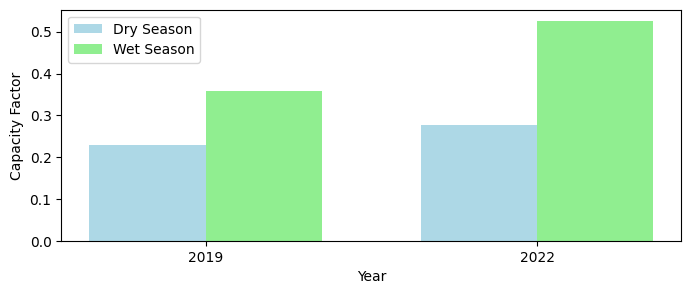

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the capacity factors
years = ['2019', '2022']
dry_season = [0.22917, 0.27790]
wet_season = [0.35858, 0.52631]

# X locations for the groups
x = np.arange(len(years))

# Bar width
width = 0.35

# Create the plot
fig, ax = plt.subplots(figsize=(8, 3))

# Plot bars for dry and wet seasons
bar1 = ax.bar(x - width/2, dry_season, width, label='Dry Season', color='lightblue')
bar2 = ax.bar(x + width/2, wet_season, width, label='Wet Season', color='lightgreen')

# Labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Capacity Factor')
# ax.set_title('Comparison of Hydropower Capacity Factor in Dry and Wet Seasons (2019 vs 2022)')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()

# Display the plot
plt.show()


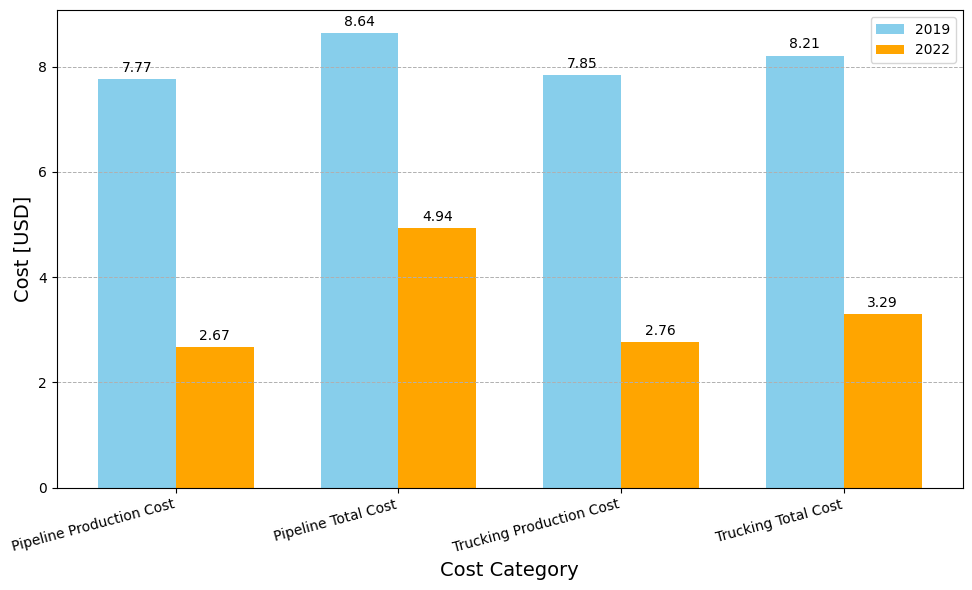

Average Capacity Factor 2019: 0.2939
Average Capacity Factor 2022: 0.4020


In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Average capacity factors for 2019 and 2022
avg_capacity_factor_2019 = (0.2292 + 0.3586) / 2  # Average for 2019
avg_capacity_factor_2022 = (0.278 + 0.526) / 2    # Average for 2022

# Extract minimum values from the dataframes for 2019 and 2022
pipeline_prod_cost_2019 = gdf_2019[f'{demand_center} pipeline production cost'].min()
pipeline_total_cost_2019 = gdf_2019[f'{demand_center} pipeline total cost'].min()
trucking_prod_cost_2019 = gdf_2019[f'{demand_center} trucking production cost'].min()
trucking_total_cost_2019 = gdf_2019[f'{demand_center} trucking total cost'].min()

pipeline_prod_cost_2022 = gdf_2022[f'{demand_center} pipeline production cost'].min()
pipeline_total_cost_2022 = gdf_2022[f'{demand_center} pipeline total cost'].min()
trucking_prod_cost_2022 = gdf_2022[f'{demand_center} trucking production cost'].min()
trucking_total_cost_2022 = gdf_2022[f'{demand_center} trucking total cost'].min()

# Categories and corresponding values for 2019 and 2022
categories = ['Pipeline Production Cost', 'Pipeline Total Cost', 'Trucking Production Cost', 'Trucking Total Cost']
costs_2019 = [pipeline_prod_cost_2019, pipeline_total_cost_2019, trucking_prod_cost_2019, trucking_total_cost_2019]
costs_2022 = [pipeline_prod_cost_2022, pipeline_total_cost_2022, trucking_prod_cost_2022, trucking_total_cost_2022]

# Create a grouped bar plot
bar_width = 0.35
index = np.arange(len(categories))

fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot for 2019 and 2022 values
bars1 = ax.bar(index, costs_2019, bar_width, label='2019', color='skyblue')
bars2 = ax.bar(index + bar_width, costs_2022, bar_width, label='2022', color='orange')

# Add labels to bars
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()<
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Labels, title, and formatting
ax.set_xlabel('Cost Category', fontsize=14)
ax.set_ylabel('Cost [USD]', fontsize=14)
# ax.set_title('Comparison of Pipeline and Trucking Costs Between 2019 and 2022', fontsize=16)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(categories, rotation=15, ha='right')
ax.legend()

# Add grid for better readability
ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)

# Display the plot
plt.tight_layout()
plt.show()

# Output the average capacity factors for 2019 and 2022
print(f"Average Capacity Factor 2019: {avg_capacity_factor_2019:.4f}")
print(f"Average Capacity Factor 2022: {avg_capacity_factor_2022:.4f}")


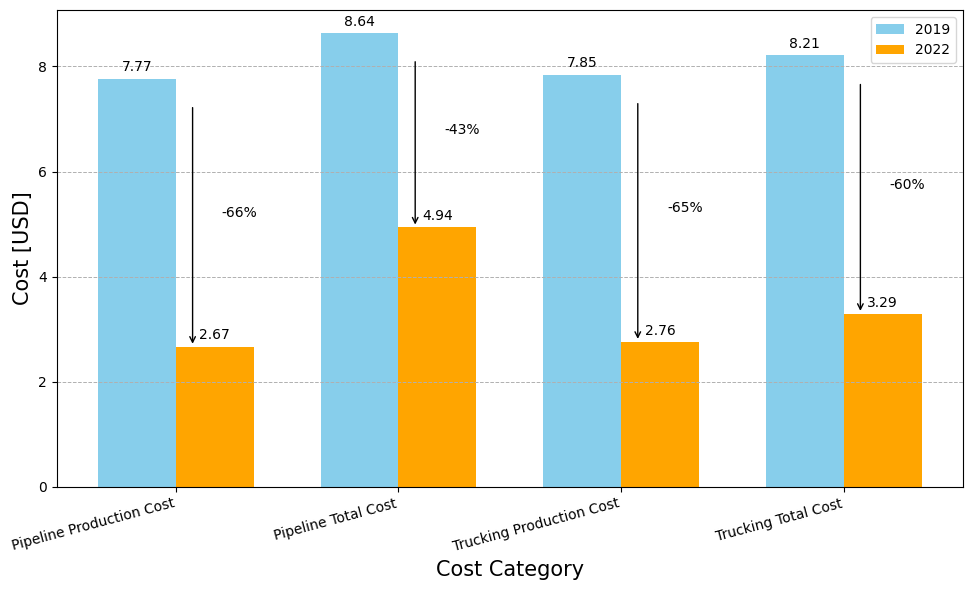

Average Capacity Factor 2019: 0.2939
Average Capacity Factor 2022: 0.4020


In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Average capacity factors for 2019 and 2022
avg_capacity_factor_2019 = (0.2292 + 0.3586) / 2  # Average for 2019
avg_capacity_factor_2022 = (0.278 + 0.526) / 2    # Average for 2022

# Extract minimum values from the dataframes for 2019 and 2022
pipeline_prod_cost_2019 = gdf_2019[f'{demand_center} pipeline production cost'].min()
pipeline_total_cost_2019 = gdf_2019[f'{demand_center} pipeline total cost'].min()
trucking_prod_cost_2019 = gdf_2019[f'{demand_center} trucking production cost'].min()
trucking_total_cost_2019 = gdf_2019[f'{demand_center} trucking total cost'].min()

pipeline_prod_cost_2022 = gdf_2022[f'{demand_center} pipeline production cost'].min()
pipeline_total_cost_2022 = gdf_2022[f'{demand_center} pipeline total cost'].min()
trucking_prod_cost_2022 = gdf_2022[f'{demand_center} trucking production cost'].min()
trucking_total_cost_2022 = gdf_2022[f'{demand_center} trucking total cost'].min()

# Categories and corresponding values for 2019 and 2022
categories = ['Pipeline Production Cost', 'Pipeline Total Cost', 'Trucking Production Cost', 'Trucking Total Cost']
costs_2019 = [pipeline_prod_cost_2019, pipeline_total_cost_2019, trucking_prod_cost_2019, trucking_total_cost_2019]
costs_2022 = [pipeline_prod_cost_2022, pipeline_total_cost_2022, trucking_prod_cost_2022, trucking_total_cost_2022]

# Create a grouped bar plot
bar_width = 0.35
index = np.arange(len(categories))

fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot for 2019 and 2022 values
bars1 = ax.bar(index, costs_2019, bar_width, label='2019', color='skyblue')
bars2 = ax.bar(index + bar_width, costs_2022, bar_width, label='2022', color='orange')

# Add labels to bars and arrows for reduction in cost
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    height_2019 = bar1.get_height()
    height_2022 = bar2.get_height()

    # Calculate percentage reduction
    reduction_percentage = ((height_2019 - height_2022) / height_2019) * 100

    ax.annotate(f'{height_2019:.2f}', xy=(bar1.get_x() + bar1.get_width() / 2, height_2019),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')
    
    ax.annotate(f'{height_2022:.2f}', xy=(bar2.get_x() + bar2.get_width() / 2, height_2022),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

    # Add downward arrow and percentage reduction
    if height_2019 > height_2022:
        ax.annotate(f'-{reduction_percentage:.0f}%', xy=(bar2.get_x() + bar_width / 2, (height_2019 + height_2022) / 2),
                    xytext=(5, 0), textcoords='offset points', ha='left', va='center', fontsize=10, color='black')
        ax.annotate('', xy=(bar2.get_x() + bar_width / 2 -0.1, height_2019),
                    xytext=(bar2.get_x() + bar_width / 2 -0.1, height_2022),
                    arrowprops=dict(arrowstyle='<-', color='black'))

# Labels, title, and formatting
ax.set_xlabel('Cost Category', fontsize=15)
ax.set_ylabel('Cost [USD]', fontsize=15)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(categories, rotation=15, ha='right')
ax.legend()

# Add grid for better readability
ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)

# Display the plot
plt.tight_layout()
plt.show()

# Output the average capacity factors for 2019 and 2022
print(f"Average Capacity Factor 2019: {avg_capacity_factor_2019:.4f}")
print(f"Average Capacity Factor 2022: {avg_capacity_factor_2022:.4f}")


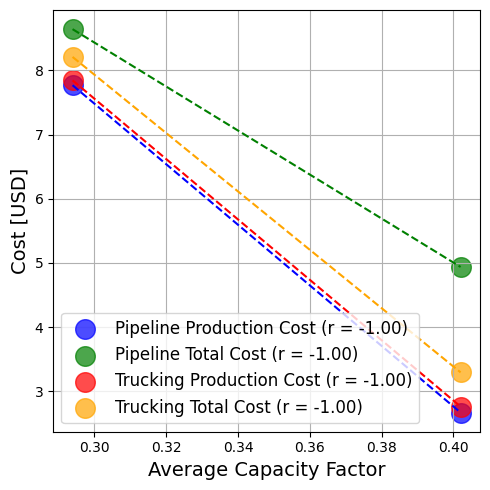

Correlation (Pipeline Production Cost): -1.00
Correlation (Pipeline Total Cost): -1.00
Correlation (Trucking Production Cost): -1.00
Correlation (Trucking Total Cost): -1.00


In [97]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Capacity factors for 2019 and 2022 (already provided)
capacity_factors = [avg_capacity_factor_2019, avg_capacity_factor_2022]  # 2019, 2022

# Costs for each year (already provided)
pipeline_prod_costs = [pipeline_prod_cost_2019, pipeline_prod_cost_2022]
pipeline_total_costs = [pipeline_total_cost_2019, pipeline_total_cost_2022]
trucking_prod_costs = [trucking_prod_cost_2019, trucking_prod_cost_2022]
trucking_total_costs = [trucking_total_cost_2019, trucking_total_cost_2022]

# Function to plot scatter with regression line
def plot_regression(x, y, label, color):
    # Calculate linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    line = slope * np.array(x) + intercept

    # Scatter plot
    plt.scatter(x, y, label=f'{label} (r = {r_value:.2f})', color=color, s=200, alpha=0.7)

    # Plot regression line
    plt.plot(x, line, color=color, linestyle='--')
    return r_value

plt.figure(figsize=(5, 5))

# Plot pipeline production costs
r_pipeline_prod = plot_regression(capacity_factors, pipeline_prod_costs, 'Pipeline Production Cost', 'blue')

# Plot pipeline total costs
r_pipeline_total = plot_regression(capacity_factors, pipeline_total_costs, 'Pipeline Total Cost', 'green')

# Plot trucking production costs
r_trucking_prod = plot_regression(capacity_factors, trucking_prod_costs, 'Trucking Production Cost', 'red')

# Plot trucking total costs
r_trucking_total = plot_regression(capacity_factors, trucking_total_costs, 'Trucking Total Cost', 'orange')

# Add labels and title
# plt.title('Inverse Correlation Between Capacity Factors and Costs (2019 vs 2022)', fontsize=16)
plt.xlabel('Average Capacity Factor', fontsize=14)
plt.ylabel('Cost [USD]', fontsize=14)

# Add a legend
plt.legend(fontsize=12)

# Show grid for better readability
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

# Output the correlation coefficients for each category
print(f"Correlation (Pipeline Production Cost): {r_pipeline_prod:.2f}")
print(f"Correlation (Pipeline Total Cost): {r_pipeline_total:.2f}")
print(f"Correlation (Trucking Production Cost): {r_trucking_prod:.2f}")
print(f"Correlation (Trucking Total Cost): {r_trucking_total:.2f}")


Pipeline Production Cost: For a 1% decrease in capacity factor, the cost increases by 4719.10%
Pipeline Total Cost: For a 1% decrease in capacity factor, the cost increases by 3427.97%
Trucking Production Cost: For a 1% decrease in capacity factor, the cost increases by 4703.74%
Trucking Total Cost: For a 1% decrease in capacity factor, the cost increases by 4547.73%


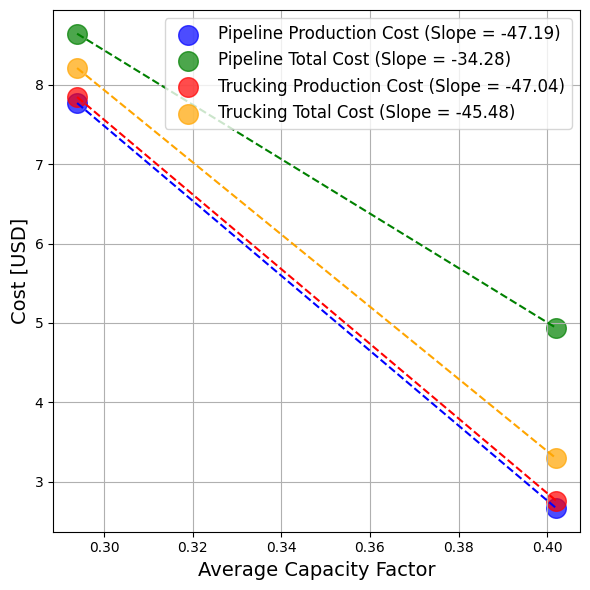

In [98]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Average capacity factors for 2019 and 2022
capacity_factors = [avg_capacity_factor_2019, avg_capacity_factor_2022]  # 2019, 2022

# Costs for each year (Pipeline Production, Pipeline Total, Trucking Production, Trucking Total)
pipeline_prod_costs = [pipeline_prod_cost_2019, pipeline_prod_cost_2022]
pipeline_total_costs = [pipeline_total_cost_2019, pipeline_total_cost_2022]
trucking_prod_costs = [trucking_prod_cost_2019, trucking_prod_cost_2022]
trucking_total_costs = [trucking_total_cost_2019, trucking_total_cost_2022]

# Function to compute percent change in costs relative to capacity factor change
def compute_percent_change(x, y, label):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    # Calculate percentage change in cost for 1% change in capacity factor
    percent_change = slope * 100  # Slope gives change in cost per unit change in capacity factor
    
    print(f'{label}: For a 1% decrease in capacity factor, the cost increases by {abs(percent_change):.2f}%')
    
    return slope, percent_change

# Compute percent changes for each category
slope_pipeline_prod, change_pipeline_prod = compute_percent_change(capacity_factors, pipeline_prod_costs, 'Pipeline Production Cost')
slope_pipeline_total, change_pipeline_total = compute_percent_change(capacity_factors, pipeline_total_costs, 'Pipeline Total Cost')
slope_trucking_prod, change_trucking_prod = compute_percent_change(capacity_factors, trucking_prod_costs, 'Trucking Production Cost')
slope_trucking_total, change_trucking_total = compute_percent_change(capacity_factors, trucking_total_costs, 'Trucking Total Cost')

# Plotting the relationship (scatter plot with regression lines)

def plot_regression(x, y, label, color):
    # Calculate linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    line = slope * np.array(x) + intercept

    # Scatter plot
    plt.scatter(x, y, label=f'{label} (Slope = {slope:.2f})', color=color, s=200, alpha=0.7)

    # Plot regression line
    plt.plot(x, line, color=color, linestyle='--')

plt.figure(figsize=(6, 6))

# Plot pipeline production costs
plot_regression(capacity_factors, pipeline_prod_costs, 'Pipeline Production Cost', 'blue')

# Plot pipeline total costs
plot_regression(capacity_factors, pipeline_total_costs, 'Pipeline Total Cost', 'green')

# Plot trucking production costs
plot_regression(capacity_factors, trucking_prod_costs, 'Trucking Production Cost', 'red')

# Plot trucking total costs
plot_regression(capacity_factors, trucking_total_costs, 'Trucking Total Cost', 'orange')

# Add labels and title
# plt.title('Relationship Between Capacity Factors and Costs (2019 vs 2022)', fontsize=16)
plt.xlabel('Average Capacity Factor', fontsize=14)
plt.ylabel('Cost [USD]', fontsize=14)

# Add a legend
plt.legend(fontsize=12)

# Show grid for better readability
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()



Pipeline Production Cost: For a 1% decrease in capacity factor, the cost increases by 2.3%
Pipeline Total Cost: For a 1% decrease in capacity factor, the cost increases by 1.8%
Trucking Production Cost: For a 1% decrease in capacity factor, the cost increases by 3.5%
Trucking Total Cost: For a 1% decrease in capacity factor, the cost increases by 2.9%


In [72]:
import plotly.graph_objects as go

# Function to generate a waterfall chart displaying total cost for 2019, changes for each component, and the total for 2022
def generate_waterfall_chart_with_changes(gdf_2019, gdf_2022, transport_type):
    # Define the columns for the cost breakdown
    columns = [
        f'Vientiane LCOH - {transport_type} battery costs portion',
        f'Vientiane LCOH - {transport_type} electrolyzer portion',
        f'Vientiane LCOH - {transport_type} H2 storage portion',
        f'Vientiane LCOH - {transport_type} wind portion',
        f'Vientiane LCOH - {transport_type} solar portion',
        f'Vientiane LCOH - {transport_type} hydro portion'
    ]
    
    # Find the row with the minimum production cost for 2019 and 2022
    min_row_2019 = gdf_2019.loc[gdf_2019[f'Vientiane {transport_type} production cost'].idxmin()]
    min_row_2022 = gdf_2022.loc[gdf_2022[f'Vientiane {transport_type} production cost'].idxmin()]

    # Extract the cost values from the minimum row for both 2019 and 2022
    cost_values_2019 = [min_row_2019[col] for col in columns]
    cost_values_2022 = [min_row_2022[col] for col in columns]

    # Calculate the cost differences between 2019 and 2022 for each component
    cost_diff = [cost_values_2022[i] - cost_values_2019[i] for i in range(len(columns))]

    # Calculate the total costs for 2019 and 2022
    total_cost_2019 = min_row_2019[f'Vientiane {transport_type} production cost']
    total_cost_2022 = min_row_2022[f'Vientiane {transport_type} production cost']

    # Calculate the percentage reduction in total cost
    percentage_reduction = ((total_cost_2019 - total_cost_2022) / total_cost_2019) * 100

    # Create labels for the waterfall chart
    labels = ["LCOH 2019"] + [col.split(" - ")[1].replace(' portion', '') for col in columns] + ["LCOH 2022"]

    # The waterfall starts with the total cost for 2019 and shows changes leading to the total for 2022
    fig = go.Figure(go.Waterfall(
        name="Cost Changes",
        orientation="v",
        measure=["absolute"] + ["relative"] * len(cost_diff) + ["total"],  # Total 2019, changes, then Total 2022
        x=labels,
        y=[total_cost_2019] + cost_diff + [total_cost_2022 - total_cost_2019],  # Total 2019, changes, and then the total difference for 2022
        text=[f"{value:.2f}" for value in [total_cost_2019] + cost_diff + [total_cost_2022]],
        connector={"line": {"color": "rgb(63, 63, 63)", "dash": "dot"}},
        increasing={"marker": {"color": "#00cc96"}},
        decreasing={"marker": {"color": "#ff4d4d"}},
        totals={"marker": {"color": "black"}}
    ))

    # # Add annotation for percentage reduction
    # fig.add_annotation(
    #     text=f"Reduction: {percentage_reduction:.2f}%",
    #     x="Total 2022", y=total_cost_2022,
    #     showarrow=False,
    #     font=dict(size=15, color="black"),
    #     align="center",
    #     xshift=20, yshift=30
    # )

    # Update layout for better visualization
    fig.update_layout(
        title=f"Cost Changes from 2019 to 2022 ({transport_type.capitalize()})",
        xaxis_title="Cost Components",
        yaxis_title="Cost [USD/kg]",
        font=dict(size=17),  # Adjust font size here
        plot_bgcolor="white",
        width=900,
        height=600,
        showlegend=False
    )

    # Show the plot
    fig.show()

# Example calls for pipeline and trucking
generate_waterfall_chart_with_changes(gdf_2019, gdf_2022, 'pipeline')
generate_waterfall_chart_with_changes(gdf_2019, gdf_2022, 'trucking')


In [43]:
# Function to calculate elasticity between cost and capacity factor using provided capacity factors
def calculate_cost_elasticity_with_seasons(gdf_2019, gdf_2022, transport_type, dry_season_cf, wet_season_cf):
    # Define the production cost column name
    production_cost_col = f'Vientiane {transport_type} production cost'
    
    # Find the minimum production cost row for both 2019 and 2022
    min_row_2019 = gdf_2019.loc[gdf_2019[production_cost_col].idxmin()]
    min_row_2022 = gdf_2022.loc[gdf_2022[production_cost_col].idxmin()]

    # Extract the production costs for 2019 and 2022
    cost_2019 = min_row_2019[production_cost_col]
    cost_2022 = min_row_2022[production_cost_col]

    # Calculate the average capacity factors for dry and wet seasons
    avg_cf_2019 = (dry_season_cf[0] + wet_season_cf[0]) / 2
    avg_cf_2022 = (dry_season_cf[1] + wet_season_cf[1]) / 2

    # Calculate percentage changes
    percent_change_cf = (avg_cf_2022 - avg_cf_2019) / avg_cf_2019 * 100
    percent_change_cost = (cost_2022 - cost_2019) / cost_2019 * 100

    # Calculate elasticity
    elasticity = percent_change_cost / percent_change_cf
    
    # Output the results
    print(f"{transport_type.capitalize()} Production Cost Elasticity:")
    print(f"Average Capacity Factor 2019: {avg_cf_2019:.4f}, Average Capacity Factor 2022: {avg_cf_2022:.4f}")
    print(f"Production Cost 2019: {cost_2019:.4f} USD, Production Cost 2022: {cost_2022:.4f} USD")
    print(f"% Change in Capacity Factor: {percent_change_cf:.2f}%, % Change in Cost: {percent_change_cost:.2f}%")
    print(f"Elasticity: {elasticity:.4f}\n")
    
    return elasticity

# Provided capacity factors for dry and wet seasons
dry_season = [0.22917, 0.27790]
wet_season = [0.35858, 0.52631]

# Calculate elasticity for pipeline
elasticity_pipeline = calculate_cost_elasticity_with_seasons(gdf_2019, gdf_2022, 'pipeline', dry_season, wet_season)

# Calculate elasticity for trucking
elasticity_trucking = calculate_cost_elasticity_with_seasons(gdf_2019, gdf_2022, 'trucking', dry_season, wet_season)


Pipeline Production Cost Elasticity:
Average Capacity Factor 2019: 0.2939, Average Capacity Factor 2022: 0.4021
Production Cost 2019: 7.7696 USD, Production Cost 2022: 2.6682 USD
% Change in Capacity Factor: 36.83%, % Change in Cost: -65.66%
Elasticity: -1.7828

Trucking Production Cost Elasticity:
Average Capacity Factor 2019: 0.2939, Average Capacity Factor 2022: 0.4021
Production Cost 2019: 7.8457 USD, Production Cost 2022: 2.7610 USD
% Change in Capacity Factor: 36.83%, % Change in Cost: -64.81%
Elasticity: -1.7598



In [48]:
# Function to calculate elasticity based on percentage change in capacity factor and cost
def calculate_cost_elasticity_with_percentages(gdf_2019, gdf_2022, transport_type, dry_season_cf, wet_season_cf):
    # Define the production and total cost columns
    production_cost_col = f'Vientiane {transport_type} production cost'
    total_cost_col = f'Vientiane {transport_type} total cost'

    # Find the minimum production cost row for both 2019 and 2022
    min_row_2019 = gdf_2019.loc[gdf_2019[production_cost_col].idxmin()]
    min_row_2022 = gdf_2022.loc[gdf_2022[production_cost_col].idxmin()]

    # Extract the production and total costs for 2019 and 2022
    production_cost_2019 = min_row_2019[production_cost_col]
    production_cost_2022 = min_row_2022[production_cost_col]

    total_cost_2019 = min_row_2019[total_cost_col]
    total_cost_2022 = min_row_2022[total_cost_col]

    # Calculate the average capacity factors for dry and wet seasons
    avg_cf_2019 = (dry_season_cf[0] + wet_season_cf[0]) / 2
    avg_cf_2022 = (dry_season_cf[1] + wet_season_cf[1]) / 2
    print(avg_cf_2019)
    print(avg_cf_2022)

    # Calculate the percentage changes in capacity factor and costs
    percent_change_cf = (avg_cf_2022 - avg_cf_2019) / avg_cf_2019 * 100
    percent_change_production_cost = (production_cost_2022 - production_cost_2019) / production_cost_2019 * 100
    percent_change_total_cost = (total_cost_2022 - total_cost_2019) / total_cost_2019 * 100

    # Calculate elasticity for production and total costs
    elasticity_production = percent_change_production_cost / percent_change_cf
    elasticity_total = percent_change_total_cost / percent_change_cf

    # Output the results
    print(f"{transport_type.capitalize()} Cost Elasticities:")
    print(f"Production Cost Elasticity: {elasticity_production:.4f} (percent change in cost per 1% change in capacity factor)")
    print(f"Total Cost Elasticity: {elasticity_total:.4f} (percent change in cost per 1% change in capacity factor)")
    print(f"% Change in Capacity Factor: {percent_change_cf:.2f}%")
    print(f"% Change in Production Cost: {percent_change_production_cost:.2f}%, % Change in Total Cost: {percent_change_total_cost:.2f}%\n")

    return elasticity_production, elasticity_total

# Provided capacity factors for dry and wet seasons (percentages)
dry_season = [0.22917, 0.27790]
wet_season = [0.35858, 0.52631]

# Calculate elasticity for pipeline
elasticity_pipeline_production, elasticity_pipeline_total = calculate_cost_elasticity_with_percentages(gdf_2019, gdf_2022, 'pipeline', dry_season, wet_season)

# Calculate elasticity for trucking
elasticity_trucking_production, elasticity_trucking_total = calculate_cost_elasticity_with_percentages(gdf_2019, gdf_2022, 'trucking', dry_season, wet_season)


0.293875
0.40210499999999993
Pipeline Cost Elasticities:
Production Cost Elasticity: -1.7828 (percent change in cost per 1% change in capacity factor)
Total Cost Elasticity: -1.1642 (percent change in cost per 1% change in capacity factor)
% Change in Capacity Factor: 36.83%
% Change in Production Cost: -65.66%, % Change in Total Cost: -42.87%

0.293875
0.40210499999999993
Trucking Cost Elasticities:
Production Cost Elasticity: -1.7598 (percent change in cost per 1% change in capacity factor)
Total Cost Elasticity: -1.6258 (percent change in cost per 1% change in capacity factor)
% Change in Capacity Factor: 36.83%
% Change in Production Cost: -64.81%, % Change in Total Cost: -59.88%

